In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the data
df=pd.read_csv("diabetes.csv") 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

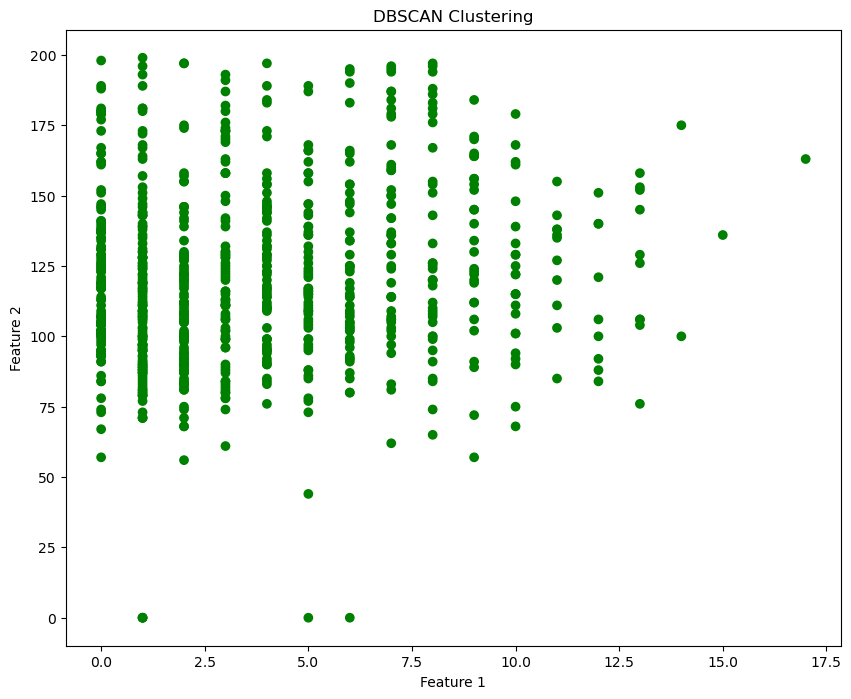

In [4]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_pred = dbscan.fit_predict(X)
colors = ['green']  # You can define more colors as needed
point_colors = [colors[label] for label in y_pred]
#Visualize the clustering
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], color=point_colors)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

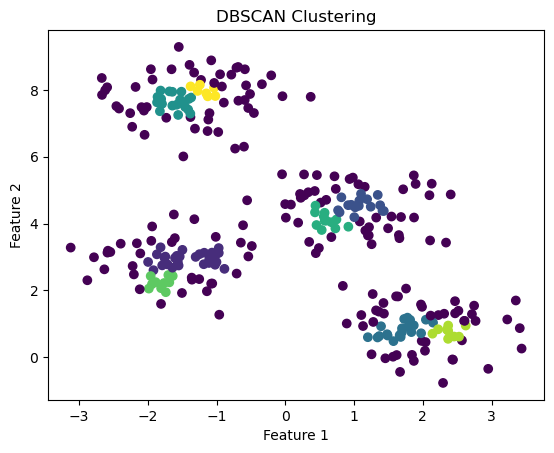

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generating sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Setting epsilon and minPts parameters
epsilon = 0.3
minPts = 10

# Creating and fitting DBSCAN model
dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
clusters = dbscan.fit_predict(X)

# Plotting the clustered data
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.show()


In [6]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


2.421 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


1.103 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


1.103 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


1.103 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


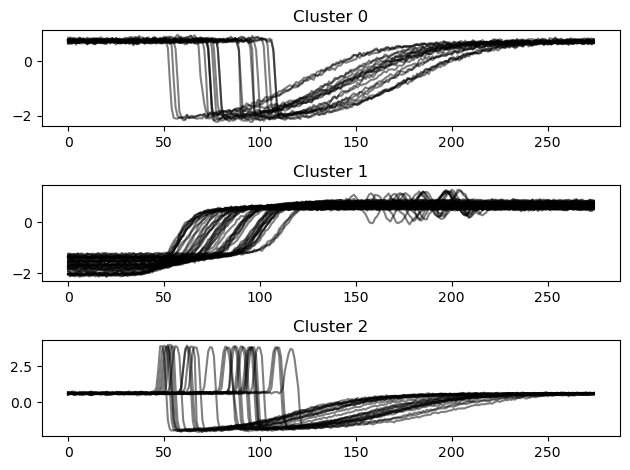

In [7]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt

# Load a time series dataset (e.g., the Trace dataset)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

# Scale the time series data
X_train_scaled = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# Apply DBSCAN
dbscan = TimeSeriesKMeans(n_clusters=3, metric="dtw", verbose=True)
dbscan.fit(X_train_scaled)

# Visualize the clustering results
plt.figure()
for cluster_idx in range(3):
    plt.subplot(3, 1, cluster_idx + 1)
    for series_idx in range(len(X_train_scaled)):
        if dbscan.labels_[series_idx] == cluster_idx:
            plt.plot(X_train_scaled[series_idx].ravel(), "k-", alpha=0.5)
    plt.title(f"Cluster {cluster_idx}")
plt.tight_layout()
plt.show()


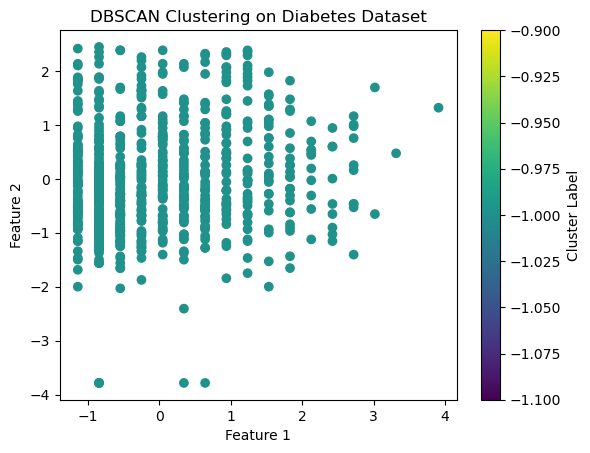

In [8]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
diabetes_df = pd.read_csv("diabetes.csv")

# Remove the outcome column (if present) as it's not needed for clustering
X = diabetes_df.drop(columns=['Outcome'])

# Scale the features (important for distance-based clustering algorithms like DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
epsilon = 0.5  # You may need to adjust this parameter based on your dataset
min_samples = 5  # You may need to adjust this parameter based on your dataset
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
y_pred = dbscan.fit_predict(X_scaled)

# Visualize the clustering results (consider visualizing only 2 or 3 dimensions at a time)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis')
plt.title('DBSCAN Clustering on Diabetes Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


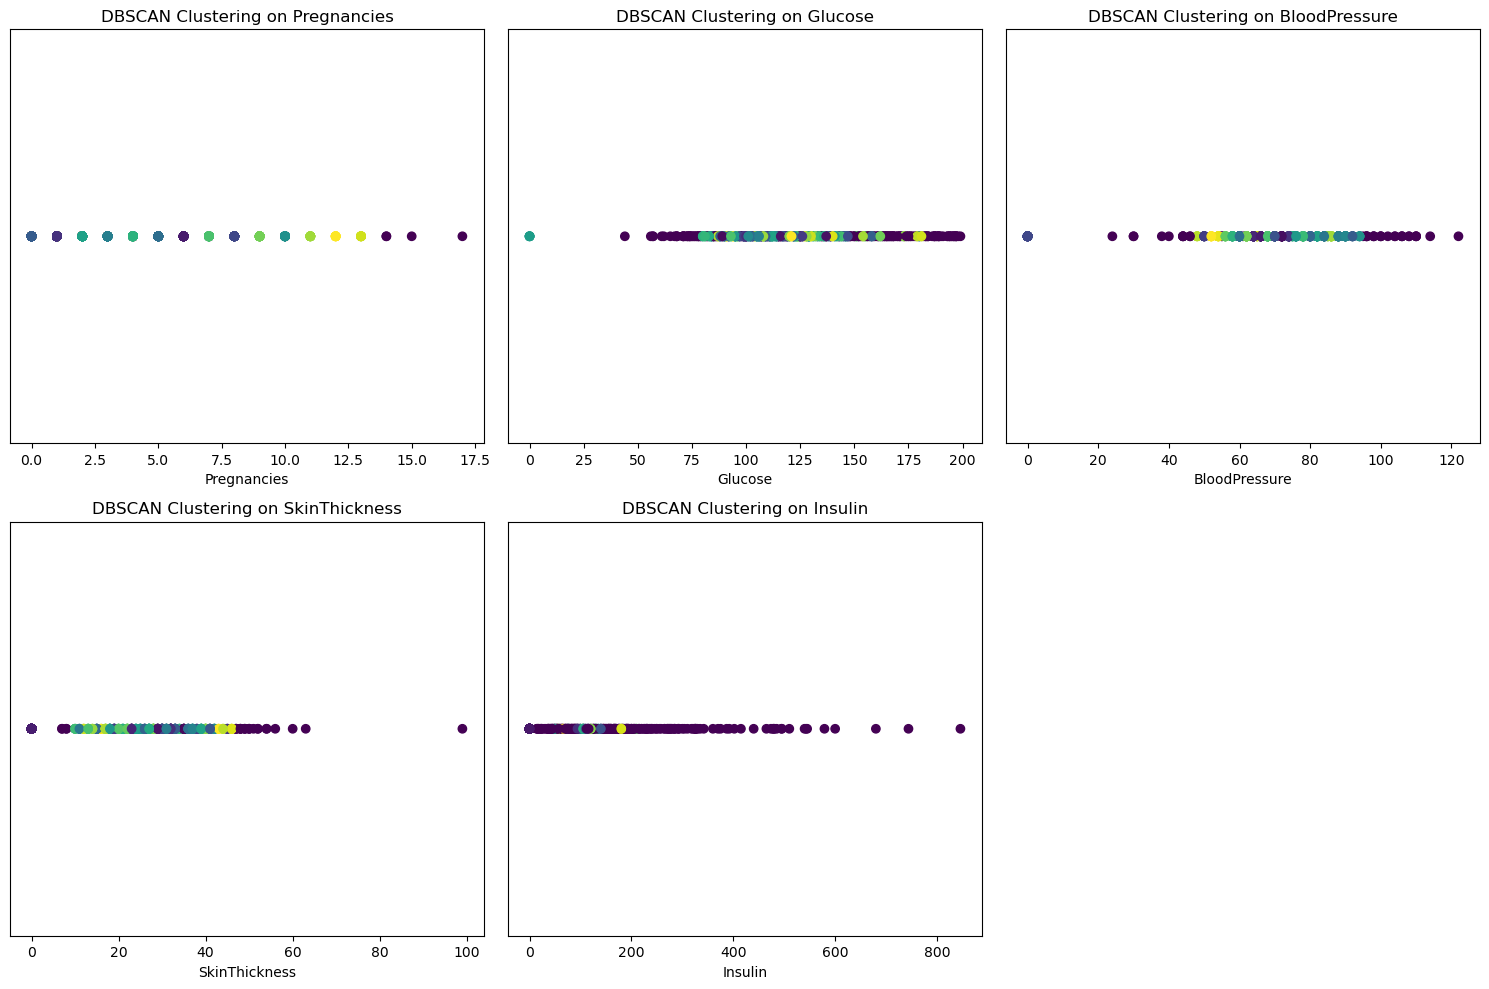

In [9]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes_df = pd.read_csv("diabetes.csv")

# Specify features for clustering
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

# Define epsilon and minPts parameters
epsilon = 0.5
minPts = 5

# Apply DBSCAN clustering on each feature separately
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, start=1):
    plt.subplot(2, 3, i)
    X_feature = diabetes_df[[feature]]
    dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    y_pred = dbscan.fit_predict(X_feature)
    plt.scatter(X_feature, [0] * len(X_feature), c=y_pred, cmap='viridis')
    plt.title(f'DBSCAN Clustering on {feature}')
    plt.xlabel(feature)
    plt.yticks([])

plt.tight_layout()
plt.show()


C:\Users\gss\AppData\Local\Temp\ipykernel_11480\2118503554.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_feature, [0] * len(X_feature), c=color, label=feature)
C:\Users\gss\AppData\Local\Temp\ipykernel_11480\2118503554.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_feature, [0] * len(X_feature), c=color, label=feature)
C:\Users\gss\AppData\Local\Temp\ipykernel_11480\2118503554.py:32: 

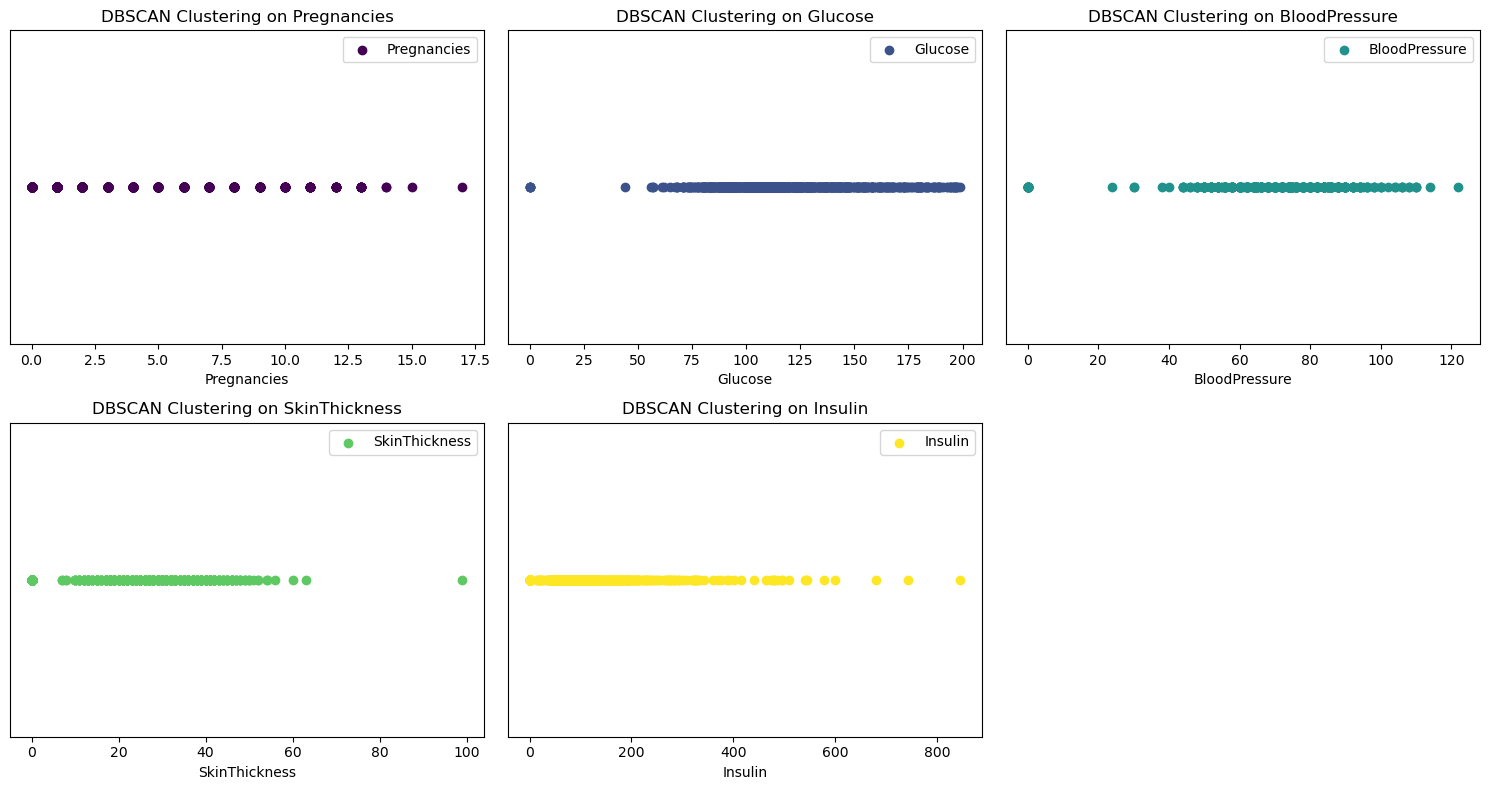

In [10]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Load the diabetes dataset
diabetes_df = pd.read_csv("diabetes.csv")

# Specify features for clustering
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

# Define epsilon and minPts parameters
epsilon = 0.5
minPts = 5

# Create subplots
plt.figure(figsize=(15, 8))

# Define a colormap for features
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))

# Iterate through each feature and plot DBSCAN clustering
for i, (feature, color) in enumerate(zip(features, colors), start=1):
    plt.subplot(2, 3, i)
    X_feature = diabetes_df[[feature]]
    
    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    y_pred = dbscan.fit_predict(X_feature)
    
    # Plot the clustering result
    plt.scatter(X_feature, [0] * len(X_feature), c=color, label=feature)
    plt.title(f'DBSCAN Clustering on {feature}')
    plt.xlabel(feature)
    plt.yticks([])
    plt.legend()

plt.tight_layout()
plt.show()


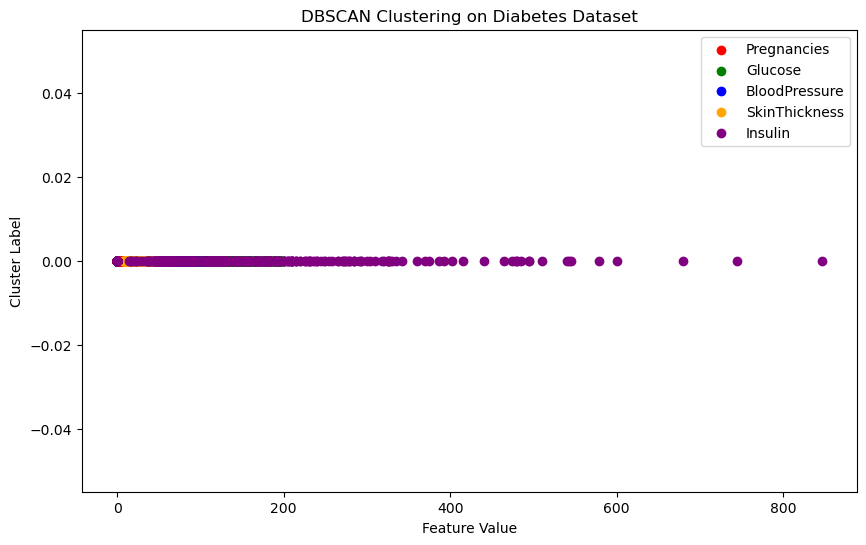

In [11]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes_df = pd.read_csv("diabetes.csv")

# Specify features for clustering
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

# Define epsilon and minPts parameters
epsilon = 0.5
minPts = 5

# Define colors for each feature
feature_colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create subplots
plt.figure(figsize=(10, 6))

# Apply DBSCAN clustering on each feature and plot them together
for feature, color in zip(features, feature_colors):
    X_feature = diabetes_df[[feature]]
    
    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    y_pred = dbscan.fit_predict(X_feature)
    
    # Plot the clustering result
    plt.scatter(X_feature, [0] * len(X_feature), color=color, label=feature)

plt.title('DBSCAN Clustering on Diabetes Dataset')
plt.xlabel('Feature Value')
plt.ylabel('Cluster Label')
plt.legend()
plt.show()


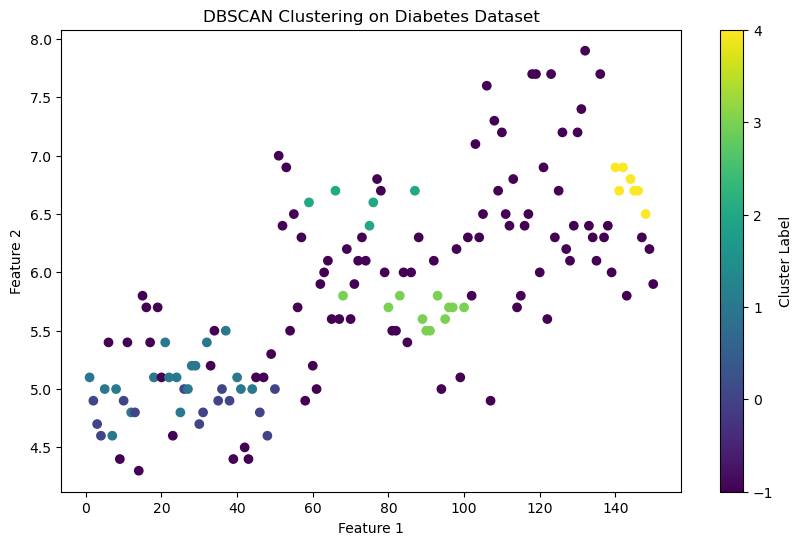

In [12]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
df = pd.read_csv("iris_dataset.csv")

# Select features for clustering
X = df.drop("Species", axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
epsilon = 0.5
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
y_pred = dbscan.fit_predict(X_scaled)

# Visualize the clustering results
plt.figure(figsize=(10, 6))

# Plot points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, cmap='viridis')
plt.title('DBSCAN Clustering on Diabetes Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()
